<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/CM_Continued_and_Data_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 12.5MB/s]


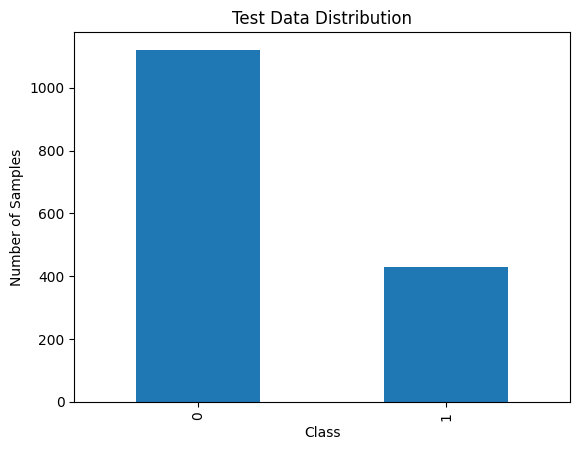

Training Data:(3619, 15),(3619,), Testing Data: (1552, 15),(1552,)
Training Acc: 0.9292622271345675


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')


# train Test Split
X = dt.drop(['label_num'],axis=1)
y = dt['label_num']
X_train,X_test,y_train,y_test = train_test_split( X,y, test_size=0.3, random_state=42)

# plot distribution
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')

model = LogisticRegression()
model.fit(X_train,y_train)
print("Training Acc:",model.score(X_train,y_train))

In [63]:
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Test Acc Score: ", accuracy_score(y_test,y_pred))

Test Acc Score:  0.9342783505154639


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Test Precision Score: ", precision_score(y_test,y_pred) )
print("Test Recall Score: ",recall_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

Test Precision Score:  0.8463157894736842
Test Recall Score:  0.9327146171693735
Test F1 Score:  0.8874172185430463


In [65]:
from sklearn.metrics import roc_curve

# this is prediction not probability
y_pred=model.predict(X_test) # thresh=0.5
y_pred

array([0, 1, 0, ..., 0, 1, 0])

### Extract Probabilities

In [68]:
y_proba=model.predict_proba(X_test)
y_proba

array([[0.96235181, 0.03764819],
       [0.43240704, 0.56759296],
       [0.97019911, 0.02980089],
       ...,
       [0.69091382, 0.30908618],
       [0.4248589 , 0.5751411 ],
       [0.97033155, 0.02966845]])

In [82]:
model.classes_

array([0, 1])

In [69]:
y_proba = y_proba[:,1]
y_proba

array([0.03764819, 0.56759296, 0.02980089, ..., 0.30908618, 0.5751411 ,
       0.02966845])

In [86]:
max(y_proba)

0.9713405927434123

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
print("AU ROC:",roc_auc_score(y_test,y_proba))

AU ROC: 0.9732795751224772


In [72]:
len(roc_curve(y_test,y_proba))

3

In [83]:
fpr, tpr, thresholds  = roc_curve(y_test,y_proba)
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.92060660e-04,
       8.92060660e-04, 1.78412132e-03, 1.78412132e-03, 2.67618198e-03,
       2.67618198e-03, 3.56824264e-03, 3.56824264e-03, 4.46030330e-03,
       4.46030330e-03, 5.35236396e-03, 5.35236396e-03, 6.24442462e-03,
       6.24442462e-03, 7.13648528e-03, 7.13648528e-03, 8.02854594e-03,
       8.02854594e-03, 8.92060660e-03, 8.92060660e-03, 1.15967886e-02,
       1.15967886e-02, 1.24888492e-02, 1.24888492e-02, 1.33809099e-02,
       1.33809099e-02, 1.42729706e-02, 1.42729706e-02, 1.51650312e-02,
       1.51650312e-02, 1.60570919e-02, 1.60570919e-02, 1.69491525e-02,
       1.69491525e-02, 1.78412132e-02, 1.78412132e-02, 1.78412132e-02,
       1.78412132e-02, 1.87332739e-02, 1.87332739e-02, 1.96253345e-02,
       1.96253345e-02, 2.05173952e-02, 2.05173952e-02, 2.23015165e-02,
       2.23015165e-02, 2.31935772e-02, 2.31935772e-02, 2.40856378e-02,
       2.40856378e-02, 2.58697591e-02, 2.58697591e-02, 2.76538805e-02,
      

In [84]:
tpr

array([0.        , 0.00232019, 0.03016241, 0.03016241, 0.09280742,
       0.09280742, 0.09976798, 0.09976798, 0.10904872, 0.10904872,
       0.15313225, 0.15313225, 0.15777262, 0.15777262, 0.16937355,
       0.16937355, 0.17169374, 0.17169374, 0.19953596, 0.19953596,
       0.20417633, 0.20417633, 0.20649652, 0.20649652, 0.21809745,
       0.21809745, 0.22041763, 0.22041763, 0.22969838, 0.22969838,
       0.35266821, 0.35266821, 0.4199536 , 0.4199536 , 0.42691415,
       0.42691415, 0.45475638, 0.45475638, 0.50812065, 0.51276102,
       0.55452436, 0.55452436, 0.5638051 , 0.5638051 , 0.57308585,
       0.57308585, 0.5962877 , 0.5962877 , 0.62412993, 0.62412993,
       0.64037123, 0.64037123, 0.67285383, 0.67285383, 0.68909513,
       0.68909513, 0.6937355 , 0.69837587, 0.70069606, 0.70069606,
       0.70301624, 0.70301624, 0.70533643, 0.70533643, 0.70765661,
       0.70765661, 0.71693735, 0.71693735, 0.72389791, 0.72389791,
       0.72853828, 0.72853828, 0.73317865, 0.73317865, 0.74941

In [85]:
thresholds[0]

1.9713405927434122

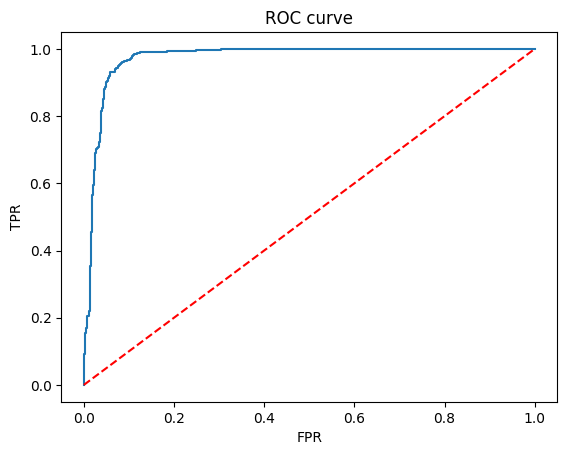

In [87]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

```
TPR = TP/TP+FN
FPR= FP/FP+TN

```

In [93]:
from sklearn.metrics import precision_recall_curve


pr,re, thr= precision_recall_curve(y_test,y_proba)
pr, re, thr

(array([0.27770619, 0.27788524, 0.27806452, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00464037, 0.00232019,
        0.        ]),
 array([5.81451837e-04, 6.43168098e-04, 6.46112750e-04, ...,
        9.69419332e-01, 9.69801098e-01, 9.71340593e-01]))

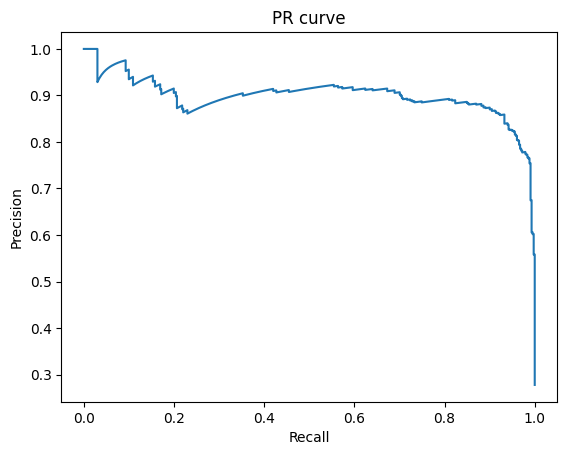

In [97]:
plt.plot(re,pr)

#random model
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

#### for threshold between 0.80 and 0.90 (0.01) , calculate f1-score

In [100]:
from sklearn.metrics import auc

auc(re,pr) # area under PR Curve

0.8992798515166267

Class Imbalance Class Wieghts

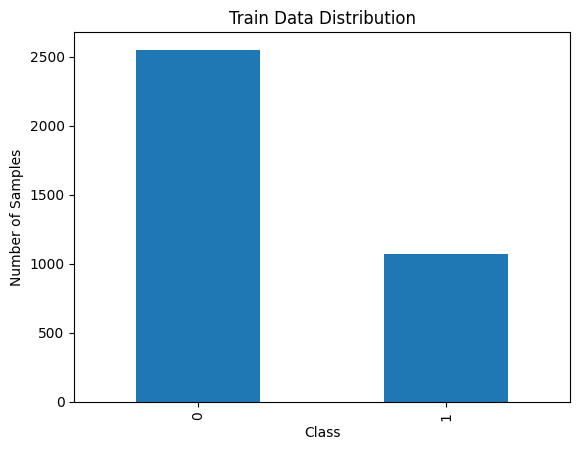

In [101]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [ ]:
y_train.value_counts()

0    2551
1    1068
Name: label_num, dtype: int64

In [102]:
2551/1068

# multiply minority class with 2.38

2.3885767790262173

Training Acc: 0.9292622271345675
Testing Acc: 0.9342783505154639
Train F1 Acc: 0.8873239436619718
Test F1 Score:  0.8874172185430463


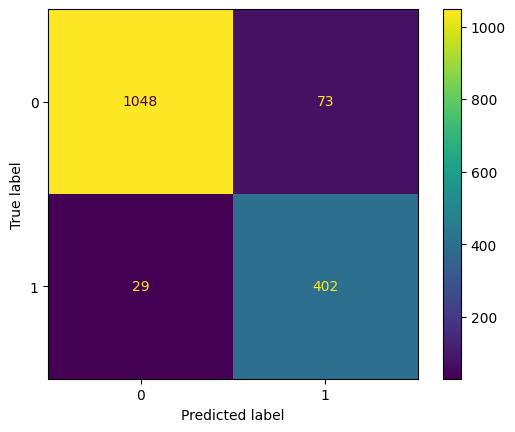

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(X_train,y_train)

print("Training Acc:",model.score(X_train,y_train))
print("Testing Acc:",model.score(X_test,y_test))

y_pred_train=model.predict(X_train)
print("Train F1 Acc:",f1_score(y_train,y_pred_train))
y_pred_test=model.predict(X_test)
print("Test F1 Score: ",f1_score(y_test,y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()

Training Acc: 0.8991434097817077
Testing Acc: 0.9091494845360825
Train F1 Acc: 0.852881902458686
Test F1 Score:  0.8582914572864322


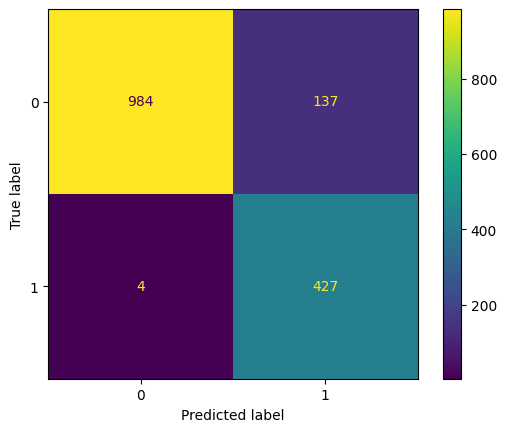

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression(class_weight={0:1, 1:2.00})

model.fit(X_train,y_train)

print("Training Acc:",model.score(X_train,y_train))
print("Testing Acc:",model.score(X_test,y_test))

y_pred_train=model.predict(X_train)
print("Train F1 Acc:",f1_score(y_train,y_pred_train))
y_pred_test=model.predict(X_test)
print("Test F1 Score: ",f1_score(y_test,y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler()


print("Before Oversampling\n", y_train.value_counts())
X_train_ovs, y_train_ovs = oversampler.fit_resample(X_train,y_train)


print("Before AfterOversampling\n", y_train_ovs.value_counts())

Before Oversampling
 0    2551
1    1068
Name: label_num, dtype: int64
Before AfterOversampling
 0    2551
1    2551
Name: label_num, dtype: int64


Training Acc: 0.9202273618188945
Testing Acc: 0.9014175257731959
Train F1 Acc: 0.9256349351361227
Test F1 Score:  0.8480635551142005


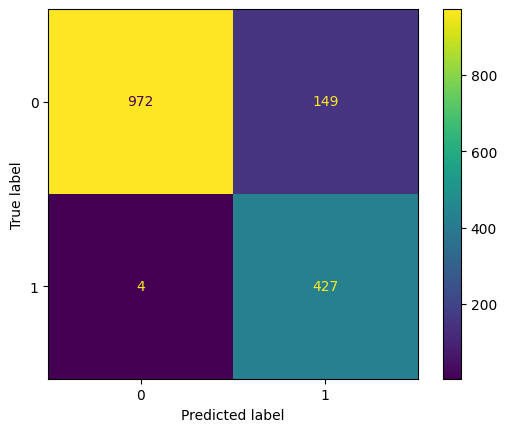

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(X_train_ovs,y_train_ovs)

print("Training Acc:",model.score(X_train_ovs,y_train_ovs))
print("Testing Acc:",model.score(X_test,y_test))

y_pred_train=model.predict(X_train_ovs)
print("Train F1 Acc:",f1_score(y_train_ovs,y_pred_train))
y_pred_test=model.predict(X_test)
print("Test F1 Score: ",f1_score(y_test,y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


smt = SMOTE()


print("Before Oversampling\n", y_train.value_counts())
X_train_sm, y_train_sm = smt.fit_resample(X_train,y_train)
print("Before AfterOversampling\n", y_train_sm.value_counts())

Before Oversampling
 0    2551
1    1068
Name: label_num, dtype: int64
Before AfterOversampling
 0    2551
1    2551
Name: label_num, dtype: int64


Training Acc: 0.9208153665229322
Testing Acc: 0.9027061855670103
Train F1 Acc: 0.9261695906432749
Test F1 Score:  0.8497512437810945


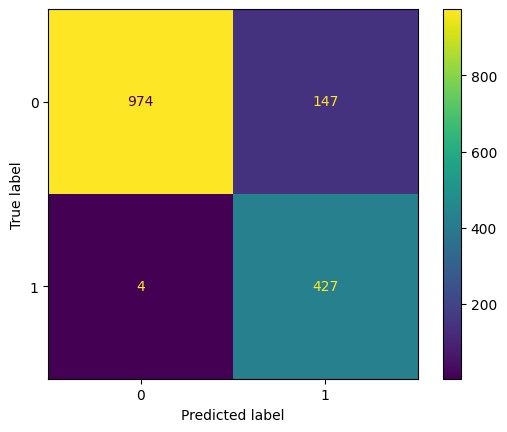

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(X_train_sm,y_train_sm)

print("Training Acc:",model.score(X_train_sm,y_train_sm))
print("Testing Acc:",model.score(X_test,y_test))

y_pred_train=model.predict(X_train_sm)
print("Train F1 Acc:",f1_score(y_train_sm,y_pred_train))
y_pred_test=model.predict(X_test)
print("Test F1 Score: ",f1_score(y_test,y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()

### HW: Use Gridsearch to find the best values of parameters for maximizing f1-score among following:
```
C = [1,5,10,15,20],
penalty= ['l1', 'l2']
solver = ['lbfgs','liblinear']
```

In [115]:
from sklearn.metrics import classification_report
print("Test Report: ",classification_report(y_test,y_pred_test))

Test Report:                precision    recall  f1-score   support

           0       1.00      0.87      0.93      1121
           1       0.74      0.99      0.85       431

    accuracy                           0.90      1552
   macro avg       0.87      0.93      0.89      1552
weighted avg       0.93      0.90      0.91      1552



read about MICRO AVG, MACRO AVG and WEIGHED AVG wrt F1-Score